# K Nearest Neighbours 

In this notebook you will be creating your very own KNN! Remember the key components of a KNN:  

1. Find distances of each test point to every train point  
2. Find the K closest neighbours (**for this assessment please use K=10**)  
3. Classify the test point based on majority vote  

You can write your code however you like, but you're only allowed to use `numpy` and `pandas`. You can use `matplotlib` and `seaborn` for plotting and visualization if you want. Please code everything yourself (including the distance function! Hint: we've already done this), but you're free to consult your notes, google etc.. Remember to modularize your code, it will also help me to debug if you run into issues during class. Pay attention to variable naming, indentation etc.  
Remember to test your functions as you create them so you know everything is working as it should be. For testing your label predictions, you don't have labels for your test data, but you do have labels for your train data -- is there something you can do?  
Please submit your final cluster assignments on BlackBoard under 'Assignments and Rubrics' --> 'KNN final clusters submissions'. This should be a csv file with a name `Yourfirstname_yourlastname_knn_test_clusters.csv`. Please submit by **Sunday, Dec 10th at 11:59PM**.



In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the training data from a CSV file into a Pandas DataFrame
knn_train_data = pd.read_csv("knn_train_data.csv")

# Read the test data from a CSV file into a Pandas DataFrame
test_data = pd.read_csv("test_data.csv")

# Convert the train and test data to numpy arrays
X_train = knn_train_data[['feature1', 'feature2']]
y_train = knn_train_data['class']
X_test = test_data[['feature1', 'feature2']]

In [5]:
# Function to find euclidean distance between 2 data points
def euclidean_distance(point1, point2):
    point2_array = point2.values  # Convert the Pandas Series to a NumPy array
    distance = np.sqrt((np.subtract(point1, point2_array)**2).sum())
    return distance

In [6]:
# Function to find k-nearest neighbors for a given test point
def find_neighbors(X_train, y_train, test_point, k):
    distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
    indices = np.argsort(distances)[:k]
    neighbors = X_train.iloc[indices]
    return neighbors, y_train.iloc[indices]


In [7]:
# Function to perform majority voting among neighbors
def majority_vote(neighbors_labels):
    unique_classes, counts = np.unique(neighbors_labels, return_counts=True)
    return unique_classes[np.argmax(counts)]

In [8]:
# Function to predict labels for a set of test points
def knn_predict(X_train, y_train, X_test, k):
    predictions = [majority_vote(find_neighbors(X_train, y_train, test_point, k)[1]) for test_point in X_test.to_numpy()]
    return predictions


In [9]:
# Call the knn_predict function
y_pred = knn_predict(X_train, y_train, X_test, 10)

# Display the predicted labels
print("Predicted Labels:", y_pred)

Predicted Labels: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'C']


In [10]:
# Save the test prediction in a CSV file
final_cluster = pd.DataFrame({'Feature1': X_test['feature1'], 'Feature2': X_test['feature2'], 'Label': y_pred})
final_cluster.to_csv('Vikas_kaushik_knn_test_clusters.csv', index=False)


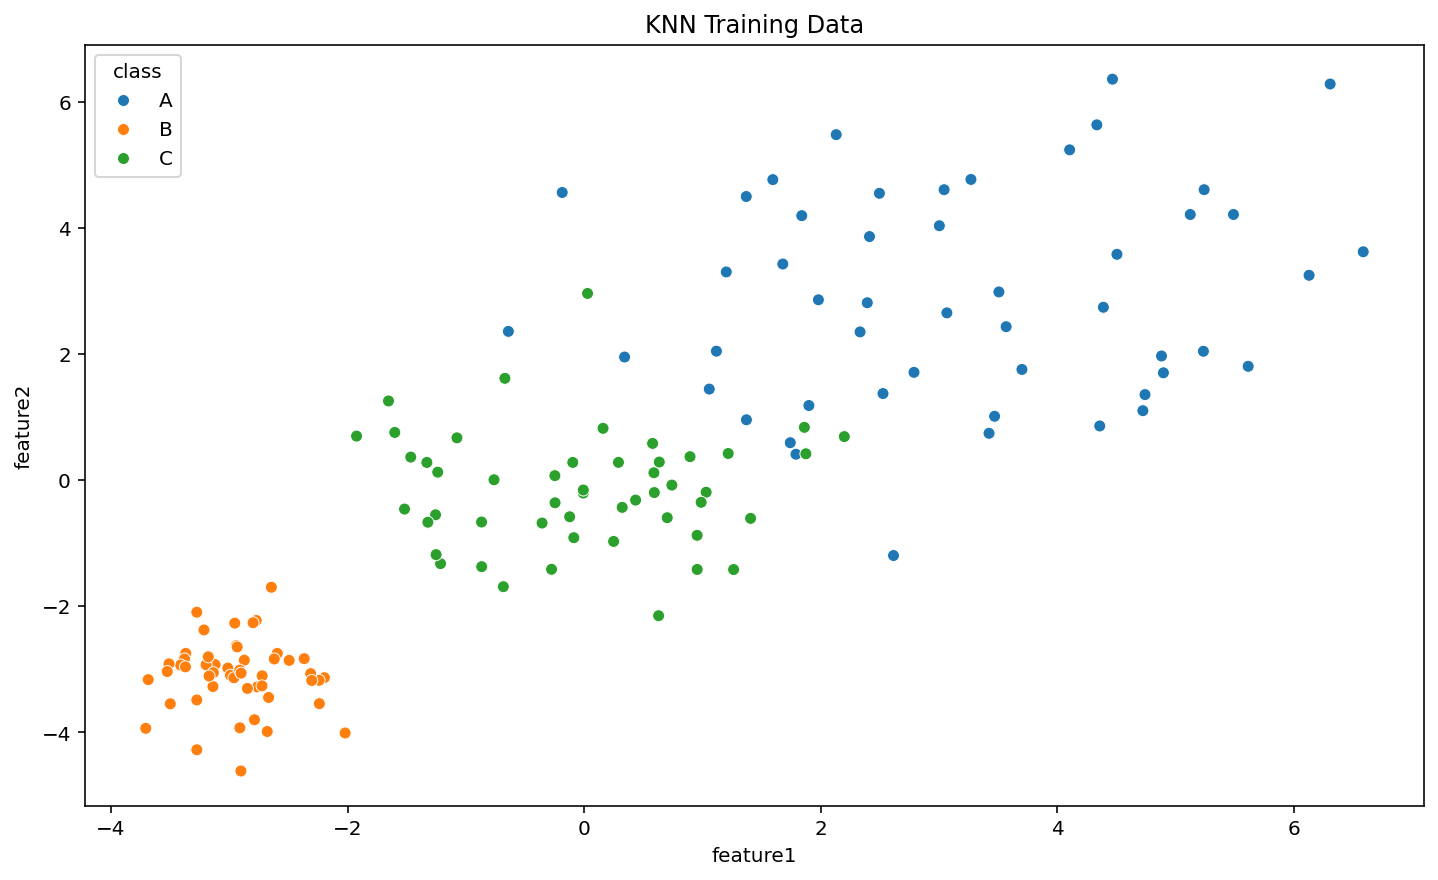

In [11]:
# X_train has the columns 'feature1' and 'feature2'
sns.scatterplot(x='feature1', y='feature2', hue='class', data=knn_train_data)
plt.title('KNN Training Data')
plt.show()

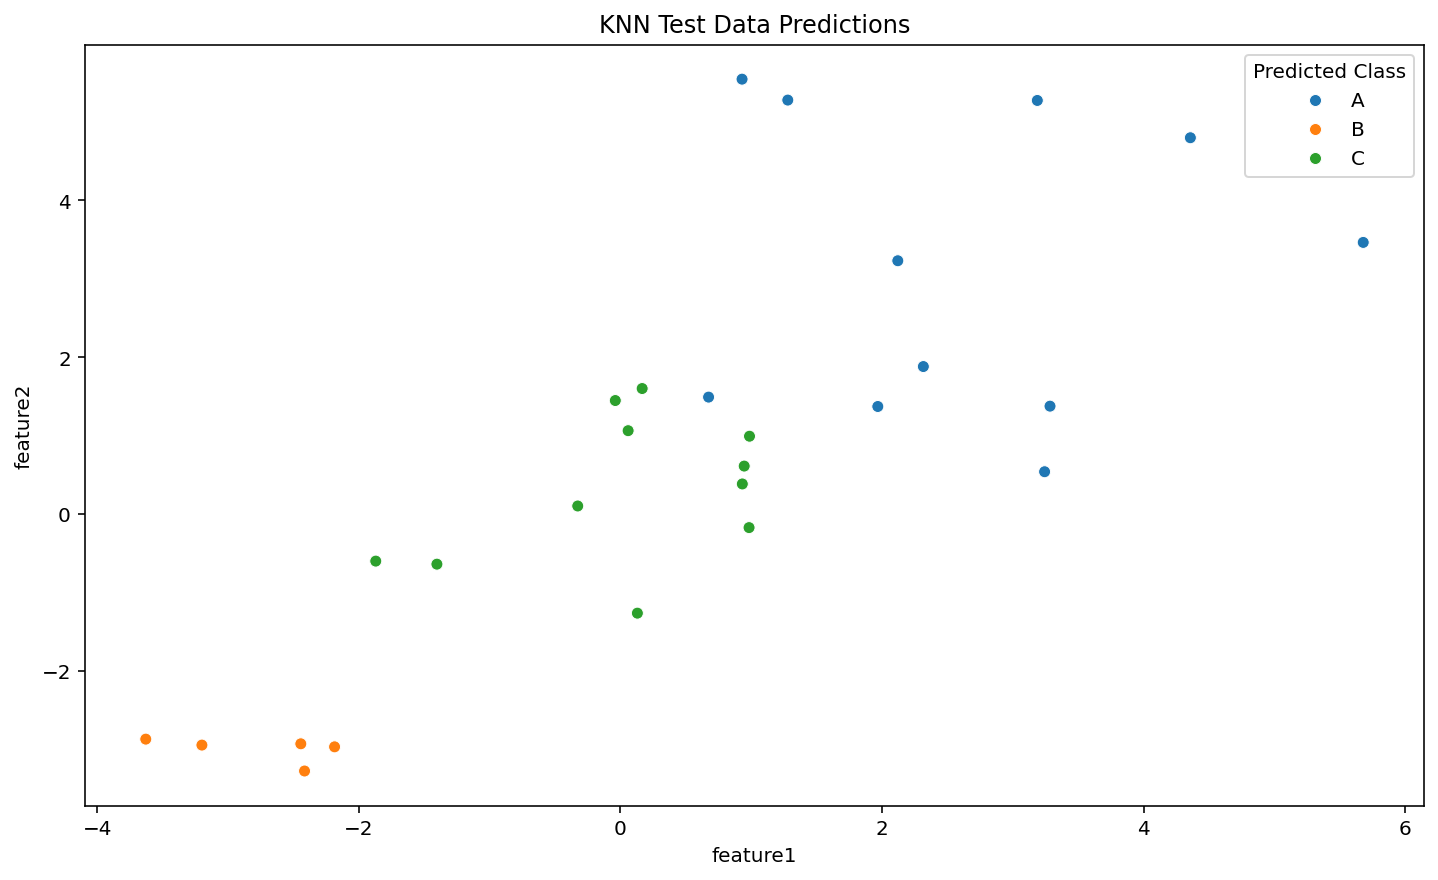

In [12]:
# X_test has the columns 'feature1' and 'feature2'
test_data['Predicted Class'] = y_pred

# Scatter plot for test data with predicted labels
sns.scatterplot(x='feature1', y='feature2', hue='Predicted Class', data=test_data)
plt.title('KNN Test Data Predictions')
plt.show()